<a href="https://colab.research.google.com/github/Eieiz007/Deep-learning/blob/main/GRU_Many_to_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import tensorflow as tf
import pandas as pd

import tensorflow as tf

from tensorflow.keras.optimizers import Adam , AdamW
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , GRU , SimpleRNN
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler

Create data

In [3]:
num_days = 700
dates = pd.date_range(start="2020-01-01", periods=num_days, freq="D")
oil_prices = 50 + 5 * np.sin(np.linspace(0, 20, num_days)) + np.random.normal(0, 1, num_days)
temperature = 30 + 10 * np.sin(np.linspace(0, 10, num_days)) + np.random.normal(0, 1, num_days)

df = pd.DataFrame({"Date": dates, "Oil_Price": oil_prices, "Temperature": temperature})

df.head()

,Date,Oil_Price,Temperature
0,2020-01-01,49.361114,29.821631
1,2020-01-02,47.327098,31.984459
2,2020-01-03,50.471481,28.772078
3,2020-01-04,50.860664,29.625199
4,2020-01-05,51.662499,31.072613


prepartation data

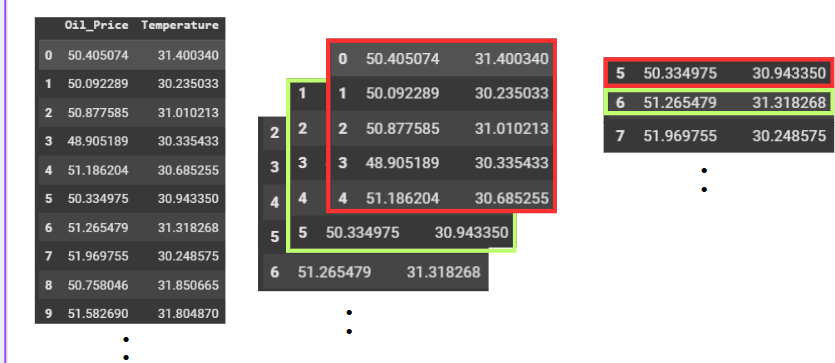

In [4]:
time_step = 20 #ใช้ข้อมูลก่อนหน้า 5 ทำนาย


In [5]:
# iloc[row,column]
#len(row) - time_step = n_subsets
print(len(df))


# y = 6 , x = [1,2,3,4,5]
# y = 7 , x = [2,3,4,5,6]
# ..............
# y = 500 , x = [495,496,497,498,499] 495 subsets


700


In [6]:
X, y = [], []

for i in range(len(df) - time_step):
    X.append(df.iloc[i:i+time_step, 1:].values)  # ใช้เฉพาะฟีเจอร์ Oil_Price และ Temperature
    # iloc[0:1+5] = [0 1 2 3 4]
    y.append(df.iloc[i+time_step, 1:].values)   # Target คือค่าของวันถัดไป
    # iloc[0+5] = [6]


In [7]:
X[:2]

[array([[49.36111443, 29.82163062],
        [47.32709791, 31.98445864],
        [50.4714807 , 28.77207769],
        [50.8606636 , 29.62519926],
        [51.66249909, 31.07261324],
        [49.50326704, 31.10361722],
        [51.45803316, 29.75437612],
        [50.05490561, 30.55888623],
        [52.37183969, 30.78160118],
        [50.73799358, 32.01343967],
        [49.71719355, 30.82450291],
        [53.92715899, 29.77748039],
        [50.62727986, 31.72839111],
        [50.73927192, 32.62949692],
        [53.62843282, 31.20811901],
        [52.40247673, 33.30116778],
        [53.20328452, 30.61938467],
        [52.73057304, 32.49753909],
        [52.83214864, 32.36551049],
        [51.82061355, 31.2427042 ]]),
 array([[47.32709791, 31.98445864],
        [50.4714807 , 28.77207769],
        [50.8606636 , 29.62519926],
        [51.66249909, 31.07261324],
        [49.50326704, 31.10361722],
        [51.45803316, 29.75437612],
        [50.05490561, 30.55888623],
        [52.37183969, 30.7

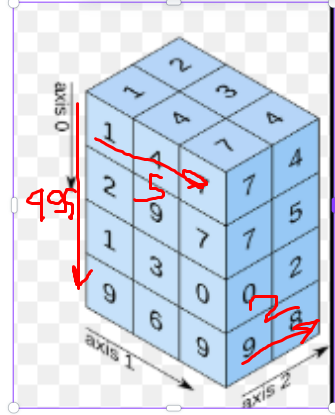

In [8]:
# แปลงเป็น numpy array
X = np.array(X)
y = np.array(y)

# ตรวจสอบ shape
X.shape, y.shape

((680, 20, 2), (680, 2))

splitting data

In [28]:
# แบ่งข้อมูล Train (70%) และ (Val+Test) (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, shuffle=False) #ห้ามสุ่มเพราะเป็น time series
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [29]:
X_train.reshape(-1, X_train.shape[-1]) #ลดให้เหลือ 2D เพราะ standardization must 2d

array([[49.36111443, 29.82163062],
       [47.32709791, 31.98445864],
       [50.4714807 , 28.77207769],
       ...,
       [48.50076725, 26.77767847],
       [49.71066184, 26.63699056],
       [49.7758634 , 26.98384719]])

In [30]:
#แปลงกลับ
X_train.reshape(-1, X_train.shape[-1]).reshape(X_train.shape)[:2] # == x_train แปลงกลับมา 3D เหมือนเดิม

array([[[49.36111443, 29.82163062],
        [47.32709791, 31.98445864],
        [50.4714807 , 28.77207769],
        [50.8606636 , 29.62519926],
        [51.66249909, 31.07261324],
        [49.50326704, 31.10361722],
        [51.45803316, 29.75437612],
        [50.05490561, 30.55888623],
        [52.37183969, 30.78160118],
        [50.73799358, 32.01343967],
        [49.71719355, 30.82450291],
        [53.92715899, 29.77748039],
        [50.62727986, 31.72839111],
        [50.73927192, 32.62949692],
        [53.62843282, 31.20811901],
        [52.40247673, 33.30116778],
        [53.20328452, 30.61938467],
        [52.73057304, 32.49753909],
        [52.83214864, 32.36551049],
        [51.82061355, 31.2427042 ]],

       [[47.32709791, 31.98445864],
        [50.4714807 , 28.77207769],
        [50.8606636 , 29.62519926],
        [51.66249909, 31.07261324],
        [49.50326704, 31.10361722],
        [51.45803316, 29.75437612],
        [50.05490561, 30.55888623],
        [52.37183969, 30.7

In [32]:

# สร้างตัวแปร StandardScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit transform กับ Training data และ Transform ชุดอื่น ๆ
X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = scaler_X.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

y_train_scaled = scaler_y.fit_transform(y_train) #y ต้องแปลงด้วยเพราะ เกิดจาก วันถัดไปของ time_step ทีตั้งเอาไว้ ค่ามันเยอะ
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

# ตรวจสอบ shape
print("Train shape:", X_train_scaled.shape, y_train_scaled.shape)
print("Validation shape:", X_val_scaled.shape, y_val_scaled.shape)
print("Test shape:", X_test_scaled.shape, y_test_scaled.shape)


Train shape: (408, 20, 2) (408, 2)
Validation shape: (136, 20, 2) (136, 2)
Test shape: (136, 20, 2) (136, 2)


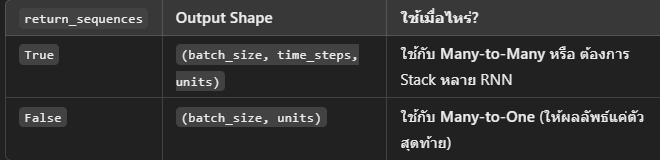

In [37]:
X_train_scaled.shape

(408, 20, 2)

In [33]:
"""
Many to one  = return_sequences=False
input_shape = (time_steps, features)

"""

# สร้างโมเดล LSTM (Many-to-One)
model = Sequential([
    GRU(256, activation='gelu', return_sequences=False, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dense(128, activation='gelu'), #FC
    Dense(64, activation='gelu'), #FC
    # BacthNormalization()
    Dense(2)  # Output 2 ค่า (Oil_Price, Temperature)
])

# คอมไพล์โมเดล
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Train โมเดล
history = model.fit(X_train_scaled, y_train_scaled,
                    validation_data=(X_val_scaled, y_val_scaled),
                    epochs=50, batch_size=None, verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.3439 - val_loss: 0.4844
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2914 - val_loss: 0.4187
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2598 - val_loss: 0.3419
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1985 - val_loss: 0.2485
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1493 - val_loss: 0.1390
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0846 - val_loss: 0.0406
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0449 - val_loss: 0.0121
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0406 - val_loss: 0.0137
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0356 - val_loss: 0.0172
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0320 - val_loss: 0.0130
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0264 - val_loss: 0.0111
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0236 - val_l

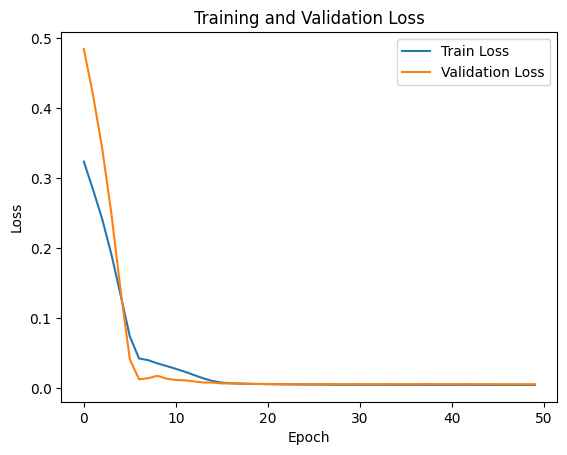

In [34]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [38]:
# ทดสอบโมเดลกับ Test set
y_pred_scaled = model.predict(X_test_scaled)
y_pred_scaled[:5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[0.39184454, 0.88611686],
       [0.38168883, 0.8753141 ],
       [0.37997597, 0.8807571 ],
       [0.37141997, 0.8727324 ],
       [0.3440265 , 0.88504165]], dtype=float32)

In [39]:
# แปลงค่ากลับเป็นสเกลเดิม
y_pred = scaler_y.inverse_transform(y_pred_scaled) #Nomalization ไม่ต้องแปลงกลับ
y_test = scaler_y.inverse_transform(y_test_scaled)
y_pred[:5] ,y_test[:5]

(array([[48.238937, 39.140663],
        [48.092205, 38.890095],
        [48.067455, 39.016342],
        [47.943836, 38.830215],
        [47.548046, 39.115723]], dtype=float32),
 array([[47.91255111, 38.29208344],
        [48.41459256, 40.11161818],
        [47.80910568, 38.38518212],
        [46.51668584, 40.42477621],
        [47.59460358, 38.78783602]]))

In [40]:
df_result = pd.DataFrame({'Actual_Oil': y_test[:, 0], 'Predicted_Oil': y_pred[:, 0],
                          'Actual_Temp': y_test[:, 1], 'Predicted_Temp': y_pred[:, 1]})
df_result

,Actual_Oil,Predicted_Oil,Actual_Temp,Predicted_Temp
0,47.912551,48.238937,38.292083,39.140663
1,48.414593,48.092205,40.111618,38.890095
2,47.809106,48.067455,38.385182,39.016342
3,46.516686,47.943836,40.424776,38.830215
4,47.594604,47.548046,38.787836,39.115723
...,...,...,...,...
131,54.260274,54.739761,22.350788,24.933319
132,56.357081,54.683701,24.722345,24.320961
133,55.295084,55.020065,24.667320,24.193048
134,55.290552,55.087151,25.003341,24.160538


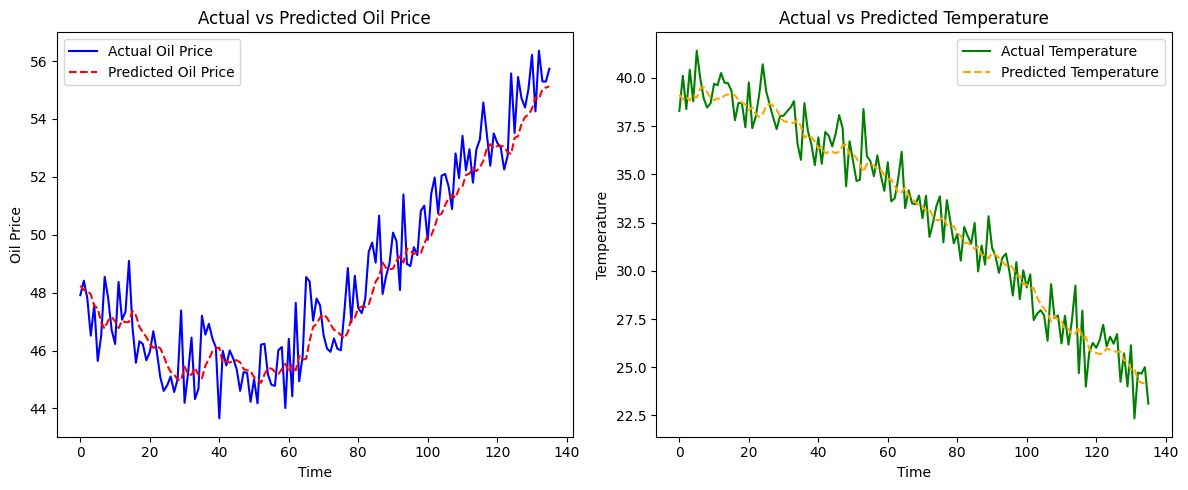

In [41]:

# ตั้งค่าขนาดของกราฟ
plt.figure(figsize=(12, 5))

# 🔹 Plot ราคาน้ำมัน (Oil Price)
plt.subplot(1, 2, 1)  # 1 แถว 2 คอลัมน์ กราฟแรก
plt.plot(df_result['Actual_Oil'], label='Actual Oil Price', color='blue')
plt.plot(df_result['Predicted_Oil'], label='Predicted Oil Price', color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.title('Actual vs Predicted Oil Price')
plt.legend()

# 🔹 Plot อุณหภูมิ (Temperature)
plt.subplot(1, 2, 2)  # กราฟที่สอง
plt.plot(df_result['Actual_Temp'], label='Actual Temperature', color='green')
plt.plot(df_result['Predicted_Temp'], label='Predicted Temperature', color='orange', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()

# แสดงกราฟ
plt.tight_layout()
plt.show()


In [42]:
# 🔹 คำนวณ Mean Absolute Percentage Error (MAPE) เป็น Accuracy
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape  # คิดเป็น % ความแม่นยำ

print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 97.75%


In [43]:
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse_test)

Test MSE: 1.1857548496119583


In [44]:
mse_test = model.evaluate(X_test_scaled, y_pred_scaled)
print("Test MSE:", mse_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3313e-15
Test MSE: 1.235939442898403e-15


In [45]:
# ดึงข้อมูลล่าสุดจาก Test Set
latest_input = X_test_scaled[-1:]  # เอาข้อมูลสุดท้าย (shape = (1, time_step, features))

# ทำนายวันถัดไป
predicted_next_scaled = model.predict(latest_input)

# แปลงค่ากลับเป็นสเกลเดิม
predicted_next = scaler_y.inverse_transform(predicted_next_scaled)

# แสดงผล
print(f"พยากรณ์วันถัดไป:")
print(f"ราคาน้ำมัน (Oil Price): {predicted_next[0,0]:.2f}")
print(f"อุณหภูมิ (Temperature): {predicted_next[0,1]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
พยากรณ์วันถัดไป:
ราคาน้ำมัน (Oil Price): 55.12
อุณหภูมิ (Temperature): 24.21


การทำงาน



```
Initial Hidden State: h_0 (เวกเตอร์ขนาด 50)
                                        ↓ ใช้เป็นค่าตั้งต้น timestep 1
Timestep 1
Input [แถวที่ 1 ของ subset 1]  → Hidden State 50 node (h_1)  
                                       ↓ ส่งค่าต่อไป timestep 2
Timestep 2
Input [แถวที่ 2 ของ subset 1]  → Hidden State 50 node (h_2)  
                                       ↓ ส่งค่าต่อไป timestep 3
Timestep 3
Input [แถวที่ 3 ของ subset 1]  → Hidden State 50 node (h_3)  
                                       ↓ ส่งค่าต่อไป timestep 4
Timestep 4
Input [แถวที่ 4 ของ subset 1]  → Hidden State 50 node (h_4)  
                                       ↓ ส่งค่าต่อไป timestep 5
Timestep 5
Input [แถวที่ 5 ของ subset 1]  → Hidden State 50 node (h_5)  → Fully Connected ทำนายแถวที่ 6

```



เป็น 50 ตัวเดิม และเส้นโยงจะเชื่อมกันทั้งหมดเช่น h_1_node_1 >                       h_2_node_1 h_2_node_2 h_2_node_3 h_2_node_.... h_2_node_50